In [4]:
# ===============================================
# Seleção das estações mais próximas
# ===============================================
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from geopy.distance import geodesic
import pandas as pd
import os

def calculate_distance_from_point_to_station(row):
    station_coord = (row['LATITUDE:'], row['LONGITUDE:'])
    given_point_coord = (-15.760063, -47.871154)
    return geodesic(station_coord, given_point_coord).kilometers

df_all_stations = pd.read_csv("./data/all_stations.csv", decimal=",", sep=";")

df_all_stations["Distancia"] = df_all_stations.apply(calculate_distance_from_point_to_station, axis=1) 

df_nearest_stations = df_all_stations[(df_all_stations["Distancia"] < 30)] 

print(df_nearest_stations)

    REGI?O: UF:  ESTAC?O: CODIGO (WMO):   LATITUDE:  LONGITUDE: ALTITUDE:  \
442      CO  DF  BRASILIA          A001  -15.789343  -47.925756   1160.96   

                                               Arquivo  Distancia  
442  INMET_CO_DF_A001_BRASILIA_01-01-2019_A_31-12-2...   6.688014  


In [5]:
# ===============================================
# União dos dados em apenas um dataframe 
# ===============================================

yeardirectoryfilename = []
df_nearest_stations_weather_data = []

for filename in df_nearest_stations['Arquivo']: 
    yeardirectoryfilename.append(filename)

    df_weather_data = pd.read_csv(f'./data/cleaned_data/2019_cleaned/{filename}', decimal=".", sep=";")
    df_nearest_stations_weather_data.append(df_weather_data)

    df_weather_data = pd.read_csv(f'./data/cleaned_data/2020_cleaned/{filename.replace("2019", "2020")}', decimal=".", sep=";")
    df_nearest_stations_weather_data.append(df_weather_data)

    df_weather_data = pd.read_csv(f'./data/cleaned_data/2021_cleaned/{filename.replace("2019", "2021")}', decimal=".", sep=";")
    df_nearest_stations_weather_data.append(df_weather_data)

    df_weather_data = pd.read_csv(f'./data/cleaned_data/2022_cleaned/{filename.replace("2019", "2022")}', decimal=".", sep=";")
    df_nearest_stations_weather_data.append(df_weather_data)

    df_weather_data = pd.read_csv(f'./data/cleaned_data/2023_cleaned/{filename.replace("2019", "2023")}', decimal=".", sep=";")
    df_nearest_stations_weather_data.append(df_weather_data)

    df_weather_data = pd.read_csv(f'./data/cleaned_data/2024_cleaned/{filename.replace("2019", "2024")}', decimal=".", sep=";")
    df_nearest_stations_weather_data.append(df_weather_data)
    

df_compilation_of_nearest_stations_weather_data = pd.concat(df_nearest_stations_weather_data, ignore_index= True)
df_compilation_of_nearest_stations_weather_data

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",RADIACAO GLOBAL (Kj/m²)
0,2019/01/01,0000 UTC,1.0,887.0,887.0,886.6,NaN,18.5,17.0,18.7,18.4,17.3,16.9,92.0,91.0,91.0,330.0,5.3,2.0,NaN
1,2019/01/01,0100 UTC,0.0,888.1,888.1,887.0,NaN,18.4,17.1,18.5,18.3,17.2,16.9,92.0,91.0,92.0,326.0,4.3,0.8,NaN
2,2019/01/01,0200 UTC,0.0,888.2,888.3,888.1,NaN,18.5,17.3,18.6,18.3,17.4,17.1,93.0,92.0,93.0,340.0,2.2,1.3,NaN
3,2019/01/01,0300 UTC,0.4,887.6,888.2,887.6,NaN,18.4,17.1,18.7,18.4,17.5,17.1,93.0,92.0,92.0,351.0,2.2,1.4,NaN
4,2019/01/01,0400 UTC,0.0,887.0,887.6,887.0,NaN,17.9,16.7,18.4,17.9,17.2,16.7,93.0,92.0,93.0,343.0,2.0,1.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52603,2024/12/31,1900 UTC,0.0,884.5,885.0,884.5,NaN,26.3,18.2,26.7,25.4,18.9,16.6,65.0,56.0,61.0,351.0,6.3,3.3,2061.5
52604,2024/12/31,2000 UTC,0.0,884.1,884.5,884.0,NaN,26.2,17.7,26.7,25.8,18.4,17.2,62.0,58.0,59.0,348.0,7.4,3.7,1940.0
52605,2024/12/31,2100 UTC,0.0,884.3,884.4,884.1,NaN,21.7,18.9,26.3,21.6,19.0,17.3,84.0,59.0,84.0,3.0,12.1,3.4,877.0
52606,2024/12/31,2200 UTC,0.0,884.5,884.5,884.1,NaN,21.3,19.4,21.8,21.2,19.4,18.8,89.0,84.0,89.0,356.0,5.3,2.5,109.8


<class 'pandas.core.frame.DataFrame'>
Index: 52608 entries, 0 to 52607
Data columns (total 19 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   Data                                                   52608 non-null  datetime64[ns]
 1   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       52561 non-null  float64       
 2   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  52563 non-null  float64       
 3   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        52553 non-null  float64       
 4   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       52553 non-null  float64       
 5   RADIACAO GLOBAL (KJ/m²)                                4693 non-null   float64       
 6   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           52560 non-null  float64       
 7   TEMPERATURA DO PONTO DE ORVALHO (°C)                   52560 non-null  f

/tmp/ipykernel_2859/2570179950.py:38: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_avarage_temperature_by_month = df_sorted.resample("M").mean()


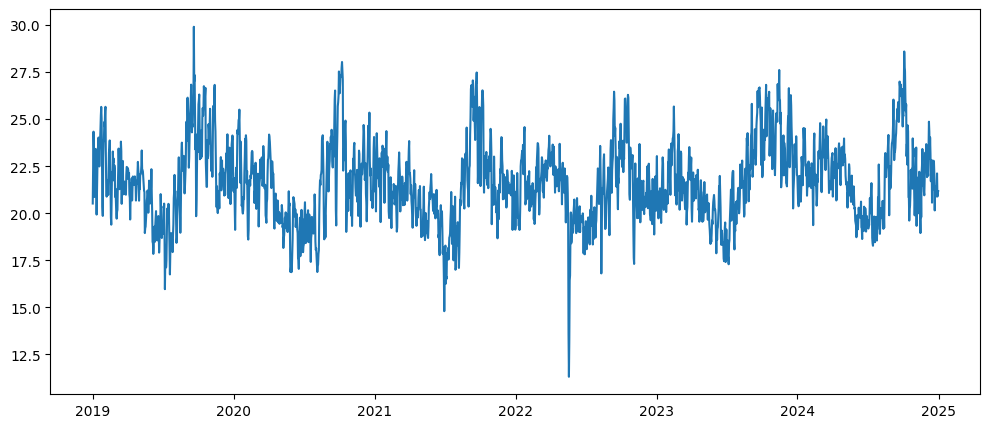

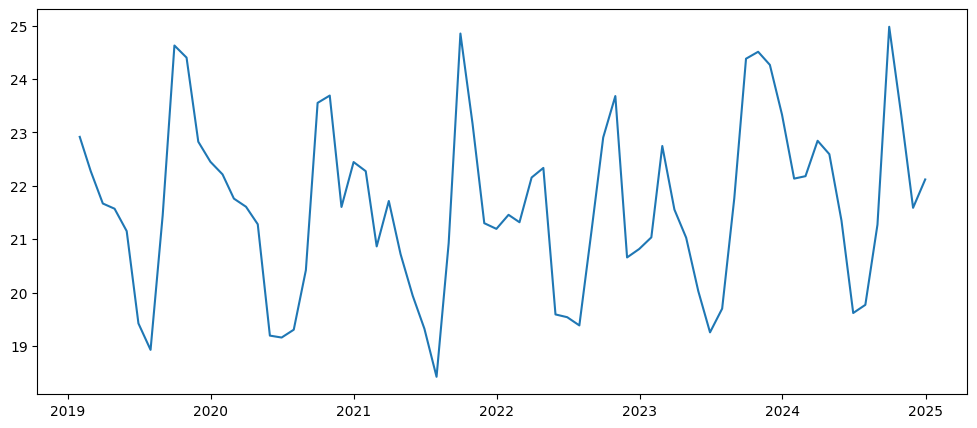

PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                            0
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)       0
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)             0
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)            0
RADIACAO GLOBAL (KJ/m²)                                  1827
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)                0
TEMPERATURA DO PONTO DE ORVALHO (°C)                        0
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)                  0
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)                  0
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)            0
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)            0
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                    0
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                    0
UMIDADE RELATIVA DO AR, HORARIA (%)                         0
VENTO, DIREÇÃO HORARIA (gr) (° (gr))                        0
VENTO, RAJADA MAXIMA (m/s)                                  0
VENTO, V

In [6]:
# ===============================================
# Plot dos dados
# ===============================================
from sklearn.metrics import mean_squared_error

df_cleaned = df_compilation_of_nearest_stations_weather_data.drop(columns=['Hora UTC'])

df_cleaned['Data'] = pd.to_datetime(df_cleaned['Data'])

df_sorted = df_cleaned.sort_values(by='Data', ascending=True)

df_sorted.info()

# escolha da variável de interesse
forecast_parameter = 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'

if(forecast_parameter == "TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)"):
    ylabel = "Temperatura (°C)"
    metric_unit = "°C"
if(forecast_parameter == "UMIDADE RELATIVA DO AR, HORARIA (%)"):
    ylabel = "Umidade (%)"
    metric_unit = "%"
if(forecast_parameter == "PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"):
    ylabel = "Precipitação (mm)"
    metric_unit = "mm"
if(forecast_parameter == "RADIACAO GLOBAL (KJ/m²)"):
    ylabel = "Radiação Global (KJ/m²)"
    metric_unit = "(KJ/m²)"  
if(forecast_parameter == "VENTO, VELOCIDADE HORARIA (m/s)"):
    ylabel = "Vento (m/s)"
    metric_unit = "m/s"

print(df_sorted.info())

# Cálcula média diária e mensal
df_sorted.set_index('Data', inplace=True)
df_avarage_temperature_by_day = df_sorted.resample("D").mean()
df_avarage_temperature_by_month = df_sorted.resample("M").mean()

print(df_avarage_temperature_by_day)

# Plot dos dados sem tratamento
plt.figure(figsize=(12, 5))
plt.plot(df_avarage_temperature_by_day[forecast_parameter], label='Dados Reais')
plt.show()
plt.figure(figsize=(12, 5))
plt.plot(df_avarage_temperature_by_month[forecast_parameter], label='Dados Reais')
plt.show()

# Verificar se há valores nulos
print(df_avarage_temperature_by_day.isnull().sum())

# Tratar valores nulos
df_not_null_values_day = df_avarage_temperature_by_day.ffill()
df_not_null_values_month = df_avarage_temperature_by_month.ffill()

# Divisão dos dados em treinamento (80%) e teste (20%)- DAILY
df_splited_data = int(len(df_not_null_values_day) * 0.8)
df_training, df_test = df_not_null_values_day[:df_splited_data], df_not_null_values_day[df_splited_data:]  

# Divisão dos dados em treinamento (80%) e teste (20%)- MONTHLY
df_splited_data_month = int(len(df_not_null_values_month) * 0.8)
df_training_month, df_test_month = df_not_null_values_month[:df_splited_data_month], df_not_null_values_month[df_splited_data_month:]  

In [7]:
from sklearn.preprocessing import MinMaxScaler

df_data_forecast_parameter = df_not_null_values_day[forecast_parameter].to_numpy() 
data = df_not_null_values_day.index

n_past = 5

def criar_janela_temporal(series, n_past):
    X, y = [], []
    for i in range(len(series) - n_past):
        X.append(series[i:i+n_past])
        y.append(series[i+n_past])
    return np.array(X), np.array(y)

# Normalização
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_data_forecast_parameter.reshape(-1,1)).flatten()

X, y = criar_janela_temporal(data_scaled, n_past)

# Divisão sequencial (sem embaralhar)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Divisão sequencial (sem embaralhar!) - DATA
data_train, data_test = data[:len(y_train)+n_past], data[len(y_train)+n_past:]

In [8]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Conversão para tensores
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# DataLoader 
batch_size = 16
train_dataset = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)


In [9]:
import torch.nn as nn

class RedeClimatica(nn.Module):
    def __init__(self, n_past):
        super().__init__()
        self.fc1 = nn.Linear(n_past, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)  # Saída única (regressão)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = RedeClimatica(n_past)


In [10]:
import torch
import torch.optim as optim
torch.manual_seed(1)


criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 100

for epoch in range(epochs):
    model.train()
    epoch_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(train_loader):.6f}")


Epoch 10/100, Loss: 0.003453
Epoch 20/100, Loss: 0.003271
Epoch 30/100, Loss: 0.003206
Epoch 40/100, Loss: 0.003155
Epoch 50/100, Loss: 0.003120
Epoch 60/100, Loss: 0.003096
Epoch 70/100, Loss: 0.003065
Epoch 80/100, Loss: 0.003048
Epoch 90/100, Loss: 0.003018
Epoch 100/100, Loss: 0.003000


MSE: 0.9766358733177185
RMSE: 0.9882488923938739 °C


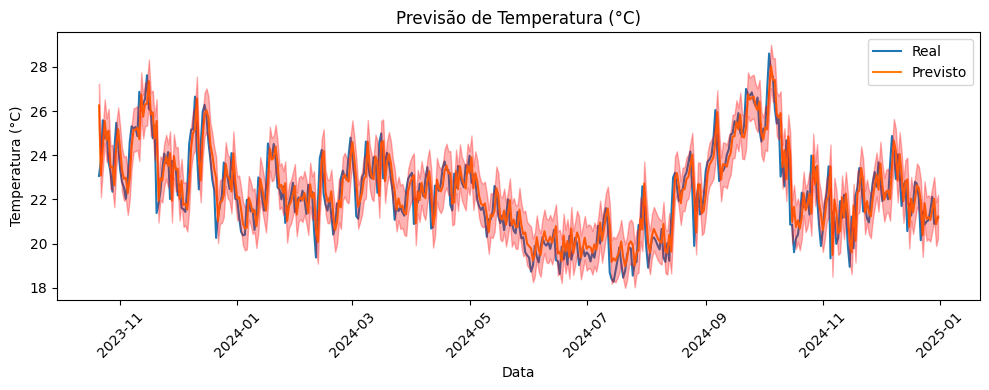

Arquivo salvo em: /home/juliababa/tcc/forecast_teste_torch.csv
         data  temperatura_observada  temperatura_prevista
0  2023-10-21              23.062000             26.254000
1  2023-10-22              23.742001             23.083000
2  2023-10-23              25.583000             24.318001
3  2023-10-24              24.757999             25.546000
4  2023-10-25              25.054001             24.680000


In [ ]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_t).squeeze().numpy()
    y_test_np = y_test_t.squeeze().numpy()

# Inverter normalização
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_inv = scaler.inverse_transform(y_test_np.reshape(-1, 1)).flatten()

# Plotar o gráfico
plt.figure(figsize=(10, 4))
plt.plot(data_test, y_test_inv, label="Real")
plt.plot(data_test, y_pred_inv, label="Previsto")
plt.legend()
plt.title(f"Previsão de {ylabel}")
plt.xlabel("Data")
plt.ylabel(ylabel)
plt.xticks(rotation=45)  # Rotacionar rótulos de datas, se necessário
plt.tight_layout()

# Cálculo erro quadrático
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = mse**0.5 
print(f'MSE: {mse}')
print(f'RMSE: {rmse} {metric_unit}')
plt.fill_between(data_test, (y_pred_inv-rmse), (y_pred_inv+rmse), alpha=.3, color='r', zorder=20)

plt.show()

import pandas as pd
from pathlib import Path

# Monta DataFrame com as colunas desejadas
df_out = pd.DataFrame({
    "data": pd.to_datetime(data_test).strftime("%Y-%m-%d"),
    "temperatura_observada": y_test_inv,
    "temperatura_prevista": y_pred_inv
})

# Arredondar (opcional)
df_out["temperatura_observada"] = df_out["temperatura_observada"].round(3)
df_out["temperatura_prevista"] = df_out["temperatura_prevista"].round(3)

# Caminho do arquivo
saida = Path("forecast_arima_rolling.csv")

# Salvar com separador ';' e encoding compatível com Excel
df_out.to_csv(saida, sep=";", index=False, encoding="utf-8-sig")

print(f"Arquivo salvo em: {saida.resolve()}")
print(df_out.head())


Epoch 10/100 | Loss: 0.003799
Epoch 20/100 | Loss: 0.003420
Epoch 30/100 | Loss: 0.003266
Epoch 40/100 | Loss: 0.003328
Epoch 50/100 | Loss: 0.003137
Epoch 60/100 | Loss: 0.003094
Epoch 70/100 | Loss: 0.003054
Epoch 80/100 | Loss: 0.003035
Epoch 90/100 | Loss: 0.003006
Epoch 100/100 | Loss: 0.002984
MSE: 0.986370
RMSE: 0.993162 °C
SMAPE: 3.4287750720977783


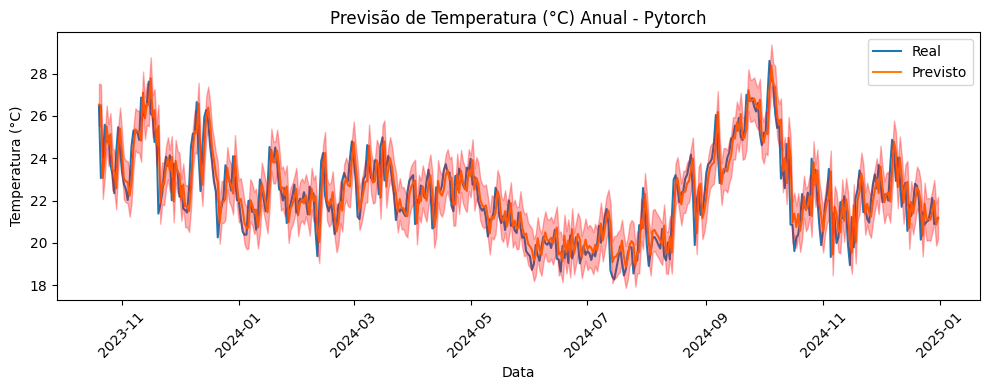

In [58]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Série bruta (sem normalizar ainda)
series = df_not_null_values_day[forecast_parameter].to_numpy()
dates  = df_not_null_values_day.index
n_past = 5

# 1) Split cronológico na SÉRIE, não nas janelas
train_ratio = 0.8
cut = int(train_ratio * len(series))

series_train = series[:cut]
# inclua n_past pontos anteriores para que as janelas do teste possam ser formadas
series_test_with_overlap = series[cut - n_past:]

# 2) Fit do scaler SÓ no treino e transform em ambos
scaler = MinMaxScaler()
scaler.fit(series_train.reshape(-1, 1))

train_scaled = scaler.transform(series_train.reshape(-1, 1)).flatten()
test_scaled  = scaler.transform(series_test_with_overlap.reshape(-1, 1)).flatten()

# 3) Crie janelas separadamente
X_train, y_train = criar_janela_temporal(train_scaled, n_past)
X_test,  y_test  = criar_janela_temporal(test_scaled,  n_past)

# 4) Datas correspondentes ao y_test (do corte em diante)
dates_test = dates[cut:]

# ===== DAQUI PRA BAIXO segue igual ao seu código (PyTorch) =====
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim

X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_t  = torch.tensor(X_test,  dtype=torch.float32)
y_test_t  = torch.tensor(y_test,  dtype=torch.float32).unsqueeze(1)

batch_size = 16
train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=batch_size, shuffle=False)

class RedeClimatica(nn.Module):
    def __init__(self, n_past):
        super().__init__()
        self.fc1 = nn.Linear(n_past, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

model = RedeClimatica(n_past)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

epochs = 100
for epoch in range(epochs):
    model.train()
    epoch_loss = 0.0
    for Xb, yb in train_loader:
        optimizer.zero_grad()
        loss = criterion(model(Xb), yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs} | Loss: {epoch_loss/len(train_loader):.6f}")

# Avaliação
model.eval()
with torch.no_grad():
    y_pred = model(X_test_t).squeeze().numpy()
    y_true = y_test_t.squeeze().numpy()

def smape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

# Inverte normalização (usando o MESMO scaler ajustado no treino)
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1,1)).flatten()
y_true_inv = scaler.inverse_transform(y_true.reshape(-1,1)).flatten()

mse = mean_squared_error(y_true_inv, y_pred_inv)
rmse = np.sqrt(mse)
smape_value = smape(y_true_inv, y_pred_inv)
print(f"MSE: {mse:.6f}")
print(f"RMSE: {rmse:.6f} {metric_unit}")
print(f'SMAPE: {smape_value}')

plt.figure(figsize=(10,4))
plt.plot(dates_test, y_true_inv, label="Real")
plt.plot(dates_test, y_pred_inv, label="Previsto")
plt.fill_between(dates_test, y_pred_inv - rmse, y_pred_inv + rmse, alpha=.3, zorder=20, color='red')
plt.title(f"Previsão de {ylabel} Anual - Pytorch")
plt.xlabel("Data"); plt.ylabel(ylabel)
plt.xticks(rotation=45); plt.tight_layout()
plt.legend(); plt.show()


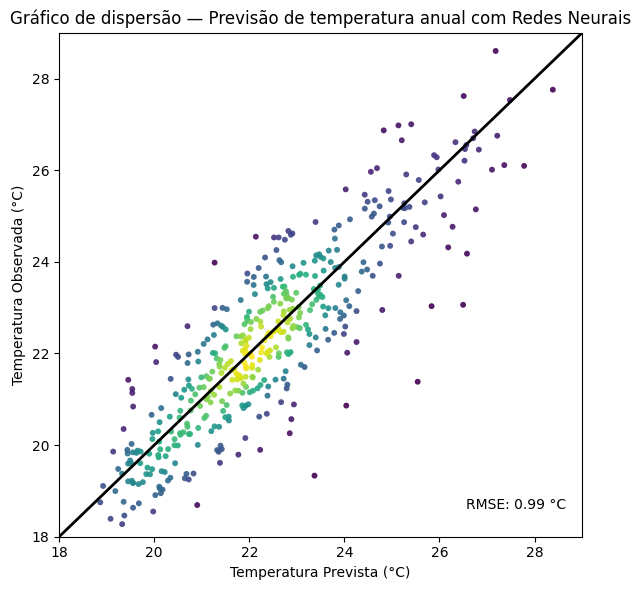

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

y_true = np.asarray(y_true_inv, dtype=float).ravel()
y_pred = np.asarray(y_pred_inv, dtype=float).ravel()
mask = np.isfinite(y_true) & np.isfinite(y_pred)
y_true, y_pred = y_true[mask], y_pred[mask]

rmse = mean_squared_error(y_true, y_pred)
# r2   = r2_score(y_true, y_pred)

vmin = float(np.floor(min(y_true.min(), y_pred.min())))
vmax = float(np.ceil(max(y_true.max(), y_pred.max())))

fig, ax = plt.subplots(figsize=(6, 6))
# Linha 1:1 preto sólido, espessura 2
ax.plot([vmin, vmax], [vmin, vmax], 'k-', lw=2)

# Dispersão colorida por densidade (kde) -> fallback hexbin
try:
    from scipy.stats import gaussian_kde
    xy = np.vstack([y_pred, y_true])
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    ax.scatter(y_pred[idx], y_true[idx], c=z[idx], s=18, alpha=0.9,
               cmap="viridis", edgecolor="none")
except Exception:
    hb = ax.hexbin(y_pred, y_true, gridsize=35,
                   extent=[vmin, vmax, vmin, vmax],
                   cmap="viridis", mincnt=1)
    fig.colorbar(hb, ax=ax, label="Densidade")

ax.set_xlim(vmin, vmax)
ax.set_ylim(vmin, vmax)
ax.set_xlabel('Temperatura Prevista (°C)')
ax.set_ylabel('Temperatura Observada (°C)')
ax.set_title(f"Gráfico de dispersão — Previsão de temperatura anual com Redes Neurais")

# Texto de métricas no canto inferior direito (igual ao utilitário)
ax.text(0.97, 0.05, f'RMSE: {rmse:.2f} °C',
        ha='right', va='bottom', transform=ax.transAxes, fontsize=10)

plt.tight_layout()
plt.show()


Epoch  30/150 | loss=0.002818
Epoch  60/150 | loss=0.002541
Epoch  90/150 | loss=0.001937
Epoch 120/150 | loss=0.002863
Epoch 150/150 | loss=0.002518

RMSE (janela 7 dias) = 0.979 °C



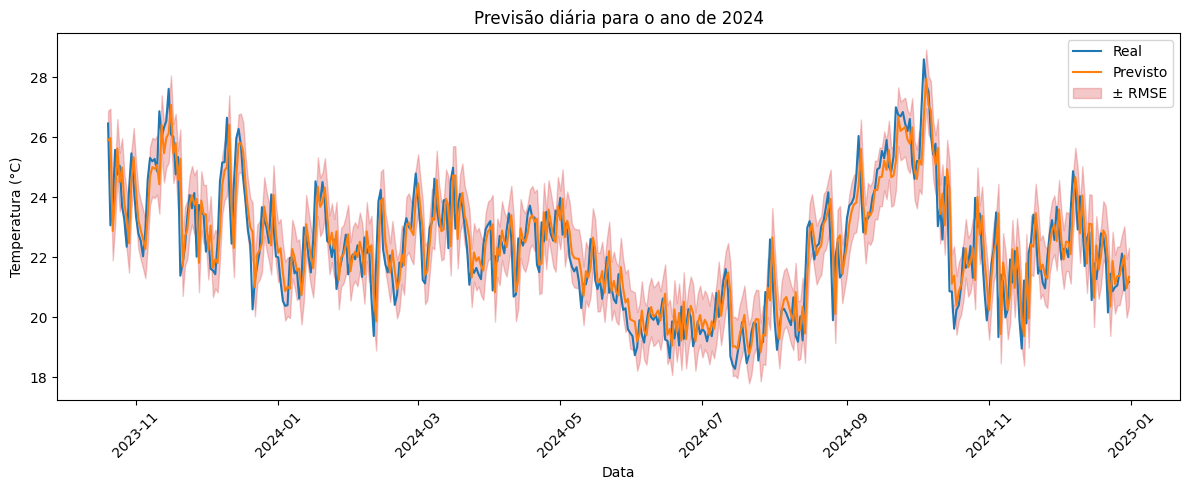

RMSE: 0.9787293907644506
Epoch 30/150 | loss=0.047391
Epoch 60/150 | loss=0.009607
Epoch 90/150 | loss=0.008291
Epoch 120/150 | loss=0.007727
Epoch 150/150 | loss=0.007273
RMSE (previsão direta 7->7, sem rolling): 0.56 °C


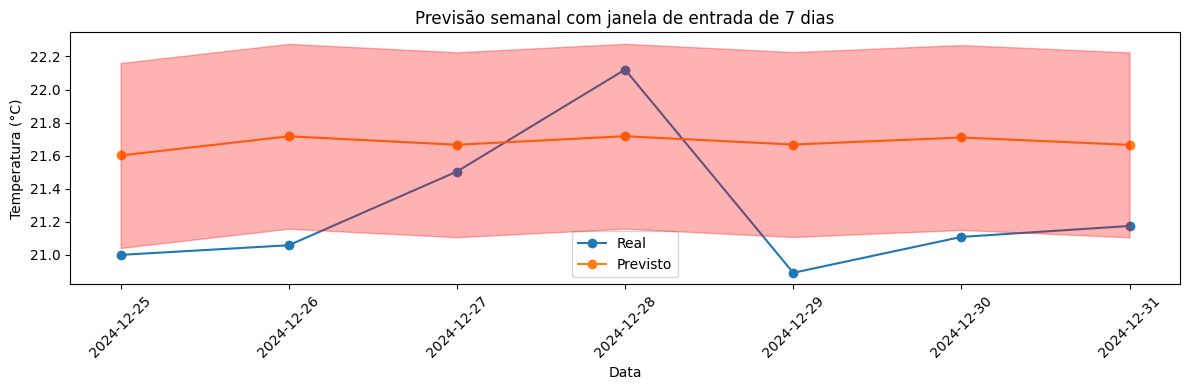

In [65]:
# ===============================================
# Previsão utilizando amostra de apenas 7 dias anteriores
# ===============================================
import pandas as pd
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import torch
torch.manual_seed(1)

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# ==============================================================
# CARREGA DADOS
# ==============================================================


serie = (
    df_not_null_values_day[forecast_parameter]
    .astype(float)
    .resample("D")
    .mean()
    .dropna()
)

data = serie.index
target_variable = serie.values

df = pd.DataFrame({"data": data, "target_variable": target_variable}).reset_index(drop=True)

# ==============================================================
# HIPERPARÂMETROS
# ==============================================================

N_PAST = 7        
BATCH  = 32
EPOCHS = 150
LR     = 1e-3

# ==============================================================
# FUNÇÕES AUXILIARES
# ==============================================================

def make_sequences(vec: np.ndarray, n_past: int):
    X, y = [], []
    for i in range(len(vec) - n_past):
        X.append(vec[i : i + n_past])
        y.append(vec[i + n_past])
    return np.array(X), np.array(y)

class RedeClimatica(nn.Module):
    def __init__(self, n_past):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_past, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
    def forward(self, x):
        return self.net(x)

# ==============================================================
# PRÉ-PROCESSAMENTO 
# ==============================================================

# split antes de escalar
split = int(0.8 * len(df))

# ajusta o scaler SÓ no treino
scaler = MinMaxScaler()
scaler.fit(df["target_variable"].iloc[:split].values.reshape(-1, 1))

# transforma treino e teste com o mesmo scaler
serie_scaled_all = scaler.transform(df["target_variable"].values.reshape(-1, 1)).flatten()

train_seq = serie_scaled_all[:split]
test_seq  = serie_scaled_all[split - N_PAST :]  # inclui lookback

X_train, y_train = make_sequences(train_seq, N_PAST)
X_test,  y_test  = make_sequences(test_seq , N_PAST)

X_train_t = torch.tensor(X_train, dtype=torch.float32).to(DEVICE)
y_train_t = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1).to(DEVICE)
X_test_t  = torch.tensor(X_test , dtype=torch.float32).to(DEVICE)
y_test_t  = torch.tensor(y_test , dtype=torch.float32).unsqueeze(1).to(DEVICE)

loader = DataLoader(TensorDataset(X_train_t, y_train_t),
                    batch_size=BATCH, shuffle=True, drop_last=False)

# ==============================================================
# TREINO
# ==============================================================

model = RedeClimatica(N_PAST).to(DEVICE)
crit  = nn.MSELoss()
opt   = torch.optim.Adam(model.parameters(), lr=LR)

for epoch in range(1, EPOCHS + 1):
    model.train()
    for xb, yb in loader:
        opt.zero_grad()
        loss = crit(model(xb), yb)
        loss.backward()
        opt.step()
    if epoch % 30 == 0:
        print(f"Epoch {epoch:3}/{EPOCHS} | loss={loss.item():.6f}")

# ==============================================================
# AVALIAÇÃO E PLOT
# ==============================================================

model.eval()
with torch.no_grad():
    y_pred_t = model(X_test_t).squeeze()

y_pred_inv = scaler.inverse_transform(y_pred_t.cpu().unsqueeze(1)).flatten()
y_test_inv = scaler.inverse_transform(y_test_t.cpu()).flatten()

rmse = (mean_squared_error(y_test_inv, y_pred_inv)) ** 0.5
print(f"\nRMSE (janela {N_PAST} dias) = {rmse:.3f} °C\n")

datas_test = df["data"].iloc[split:]

plt.figure(figsize=(12,5))
plt.plot(datas_test, y_test_inv , label="Real")
plt.plot(datas_test, y_pred_inv, label="Previsto")
plt.fill_between(datas_test,
                 y_pred_inv - rmse,
                 y_pred_inv + rmse,
                 alpha=.25, color="tab:red",
                 label="± RMSE")
plt.title("Previsão diária para o ano de 2024")
plt.xlabel("Data")
plt.ylabel(ylabel)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

print(f'RMSE: {rmse}')

# # ==============================================================
# # FORECAST "ROLLING" — Previsão de 7 dias
# # ==============================================================

# steps_ahead = 7
# lookback = serie_scaled_all[-N_PAST:].copy()
# future_dates = pd.date_range(df["data"].iloc[-steps_ahead-1] + pd.Timedelta(days=1),
#                              periods=steps_ahead, freq="D")
# preds_scaled = []

# model.eval()
# with torch.no_grad():
#     for _ in range(steps_ahead):
#         inp = torch.tensor(lookback, dtype=torch.float32).unsqueeze(0).to(DEVICE)
#         next_scaled = model(inp).item()
#         preds_scaled.append(next_scaled)
#         lookback = np.append(lookback[1:], next_scaled)

# future_preds = scaler.inverse_transform(np.array(preds_scaled).reshape(-1,1)).flatten()

# plt.figure(figsize=(12,4))
# plt.plot(future_dates, future_preds, "o-", label="Previsão 7 dias")
# plt.plot(df["data"].iloc[-7:], df["target_variable"].iloc[-7:], label="Últimos 7 dias do Histórico")
# plt.title("Previsão utilizando amostra de 7 dias anteriores (Pytorch)")
# plt.xlabel("Data"); plt.ylabel(ylabel); plt.legend()
# plt.xticks(rotation=45); plt.tight_layout(); plt.show()

# # Valores reais vs previstos (últimos 7 dias)
# y_true = df['target_variable'].iloc[-7:].values
# y_pred = future_preds
# rmse = np.sqrt(mean_squared_error(y_true, y_pred))
# print(f"RMSE dos últimos 7 dias: {rmse:.2f}")

# ==============================================================
# PREVISÃO DIRETA (7 -> 7) — SEM REALIMENTAÇÃO
# ==============================================================

import numpy as np
import torch
import torch.nn as nn
from sklearn.metrics import mean_squared_error

N_INPUT  = 7
N_OUTPUT = 7

# 1) Construtor de janelas multietapas: 7 entradas -> 7 saídas
def make_sequences_multistep(vec: np.ndarray, n_input: int, n_output: int):
    X, Y = [], []
    for i in range(len(vec) - n_input - n_output + 1):
        X.append(vec[i : i + n_input])
        Y.append(vec[i + n_input : i + n_input + n_output])
    return np.array(X), np.array(Y)

# 2) Usa SOMENTE histórico antes da última semana como treino
train_end = len(df) - N_OUTPUT  # tudo antes dos últimos 7 dias
X_tr, y_tr = make_sequences_multistep(serie_scaled_all[:train_end], N_INPUT, N_OUTPUT)

Xtr_t = torch.tensor(X_tr, dtype=torch.float32).to(DEVICE)
ytr_t = torch.tensor(y_tr, dtype=torch.float32).to(DEVICE)

# 3) MLP 7->7 (direto, sem feedback)
class RedeSemanaDireta(nn.Module):
    def __init__(self, in_features=7, out_features=7):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_features, 64), nn.ReLU(),
            nn.Linear(64, 32),          nn.ReLU(),
            nn.Linear(32, out_features)
        )
    def forward(self, x): return self.net(x)

model_dir = RedeSemanaDireta(N_INPUT, N_OUTPUT).to(DEVICE)
crit  = nn.MSELoss()
opt   = torch.optim.Adam(model_dir.parameters(), lr=1e-3)

EPOCHS = 150
for ep in range(1, EPOCHS+1):
    model_dir.train()
    opt.zero_grad()
    pred = model_dir(Xtr_t)
    loss = crit(pred, ytr_t)
    loss.backward()
    opt.step()
    if ep % 30 == 0:
        print(f"Epoch {ep}/{EPOCHS} | loss={loss.item():.6f}")

# 4) Previsão da ÚLTIMA semana sem realimentação
X_input_final = serie_scaled_all[-(N_INPUT + N_OUTPUT):-N_OUTPUT].reshape(1, -1)
model_dir.eval()
with torch.no_grad():
    preds_scaled = model_dir(torch.tensor(X_input_final, dtype=torch.float32).to(DEVICE)).cpu().numpy().flatten()

y_pred = scaler.inverse_transform(preds_scaled.reshape(-1,1)).flatten()
y_true = df['target_variable'].iloc[-N_OUTPUT:].values
datas  = df['data'].iloc[-N_OUTPUT:].values

rmse = float(np.sqrt(mean_squared_error(y_true, y_pred)))
print(f"RMSE (previsão direta 7->7, sem rolling): {rmse:.2f} {metric_unit}")

# 5) Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(datas, y_true, marker="o", label="Real")
plt.plot(datas, y_pred, marker="o", label="Previsto")
plt.fill_between(datas, y_pred - rmse, y_pred + rmse, alpha=.3, zorder=20, color='red')
plt.title("Previsão semanal com janela de entrada de 7 dias")
plt.xlabel("Data")
plt.ylabel(ylabel)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()



Epoch 30/150 | loss=0.006039
Epoch 60/150 | loss=0.005202
Epoch 90/150 | loss=0.004933
Epoch 120/150 | loss=0.004331
Epoch 150/150 | loss=0.004118

RMSE: 0.59 °C


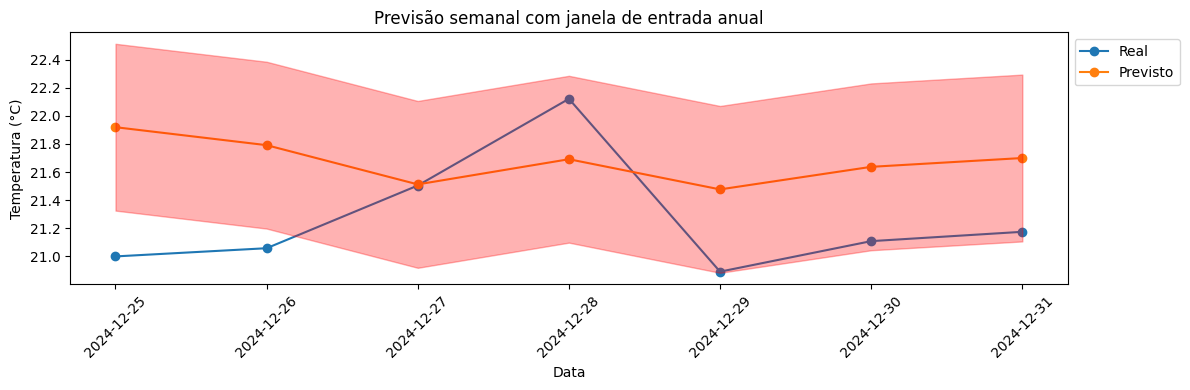

In [ ]:
# ===============================================
# Previsões de 7 dias com janela de entrada anual
# ===============================================
import torch
torch.manual_seed(1)


N_INPUT  = 358
N_OUTPUT = 7

df = pd.DataFrame({"data": data, "target_variable": target_variable}).reset_index(drop=True)

# define corte temporal: tudo antes dos últimos 7 dias é "passado"
train_end = len(df) - N_OUTPUT
if train_end <= N_INPUT:
    raise ValueError("Série curta demais para N_INPUT e N_OUTPUT escolhidos.")

# ajusta scaler APENAS no passado
scaler = MinMaxScaler()
scaler.fit(df.loc[:train_end-1, "target_variable"].values.reshape(-1, 1))

# transforma série inteira com os parâmetros aprendidos no passado
serie_scaled = scaler.transform(df["target_variable"].values.reshape(-1, 1)).flatten()

# -----------------------
# Amostras de TREINO 
# Gera janelas somente no trecho de treino (até train_end)
# -----------------------
def make_sequences_multistep(vec: np.ndarray, n_input: int, n_output: int):
    X, y = [], []
    for i in range(len(vec) - n_input - n_output + 1):
        X.append(vec[i : i + n_input])
        y.append(vec[i + n_input : i + n_input + n_output])
    return np.array(X), np.array(y)

serie_scaled_train = serie_scaled[:train_end]  # apenas passado
X_train, y_train   = make_sequences_multistep(serie_scaled_train, N_INPUT, N_OUTPUT)

Xtr_t = torch.tensor(X_train, dtype=torch.float32).to(DEVICE)
ytr_t = torch.tensor(y_train,  dtype=torch.float32).to(DEVICE)


class RedeAnoInteiro(nn.Module):
    def __init__(self, input_dim, output_dim=7):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128), nn.ReLU(),
            nn.Linear(128, 64),       nn.ReLU(),
            nn.Linear(64, output_dim)
        )
    def forward(self, x):
        return self.net(x)

model_ano = RedeAnoInteiro(N_INPUT).to(DEVICE)
crit = nn.MSELoss()
opt  = torch.optim.Adam(model_ano.parameters(), lr=1e-3)
loader = DataLoader(TensorDataset(Xtr_t, ytr_t), batch_size=16, shuffle=True)

EPOCHS = 150
for ep in range(1, EPOCHS+1):
    model_ano.train()
    loss_sum = 0.0
    for xb, yb in loader:
        opt.zero_grad()
        pred = model_ano(xb)
        loss = crit(pred, yb)
        loss.backward()
        opt.step()
        loss_sum += loss.item()
    if ep % 30 == 0:
        print(f"Epoch {ep}/{EPOCHS} | loss={loss_sum/len(loader):.6f}")

# -----------------------
# PREVISÃO DOS ÚLTIMOS 7 DIAS
# Usa a ÚLTIMA janela de 358 dias ANTES do alvo
# -----------------------
X_input_final = serie_scaled[-(N_INPUT + N_OUTPUT):-N_OUTPUT].reshape(1, -1)
X_input_final_t = torch.tensor(X_input_final, dtype=torch.float32).to(DEVICE)

model_ano.eval()
with torch.no_grad():
    preds_scaled = model_ano(X_input_final_t).cpu().numpy().flatten()

# inverte escala com o MESMO scaler (ajustado no passado)
preds_real     = scaler.inverse_transform(preds_scaled.reshape(-1, 1)).flatten()
y_target_real  = df["target_variable"].iloc[-N_OUTPUT:].values

# Métrica
rmse = np.sqrt(mean_squared_error(y_target_real, preds_real))
print(f"\nRMSE: {rmse:.2f} {metric_unit}")

# Plot
datas_reais = df["data"].iloc[-N_OUTPUT:]
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(datas_reais, y_target_real, marker="o", label="Real")
ax.plot(datas_reais, preds_real,  marker="o", label="Previsto")
ax.fill_between(datas_reais, preds_real - rmse, preds_real + rmse,
                alpha=.3, zorder=20, color='red')

# 1) Aumentar limite superior do Y (ex.: 5% acima do máximo observado)
ymax = max(np.max(y_target_real), np.max(preds_real))
ax.set_ylim(top=ymax * 1.05)        # ou ax.set_ylim(ax.get_ylim()[0], ymax * 1.05)

# 2) Legenda no canto superior direito (dentro do gráfico)
ax.legend(loc='upper right')

ax.set_title("Previsão semanal com janela de entrada anual")
ax.set_xlabel("Data"); ax.set_ylabel(ylabel)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

DEVICE: cuda
Semanas válidas: 6 | Anos: [2019, 2020, 2021, 2022, 2023, 2024]
k escolhido: 4  | nº de janelas (N-k) = 2
Shapes -> X_train: (1, 28) X_test: (1, 28)
Época 50/500 | Loss=521.8517
Época 100/500 | Loss=454.5295
Época 150/500 | Loss=262.6439
Época 200/500 | Loss=51.3199
Época 250/500 | Loss=0.8932
Época 300/500 | Loss=0.0237
Época 350/500 | Loss=0.0000
Época 400/500 | Loss=0.0000
Época 450/500 | Loss=0.0000
Época 500/500 | Loss=0.0000

RMSE (25–31/12) usando k=4 anos -> alvo 2024: 2.04 °C


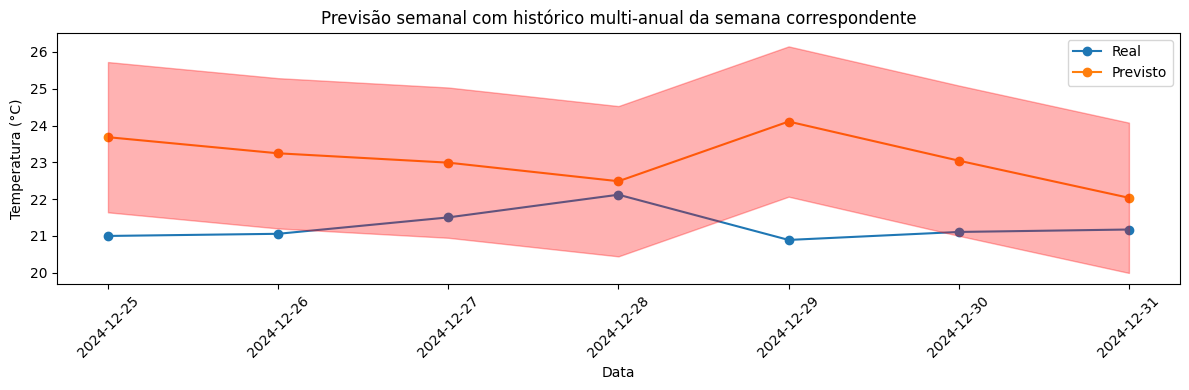

In [ ]:
# ===============================================
# Previsão de 7 dias com histórico multi-anual da semana correspondente
# ===============================================
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# ===== DISPOSITIVO =====
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print("DEVICE:", DEVICE)

# -------------------------------------------------
# 1) EXTRAÇÃO & LIMPEZA DA SEMANA 25–31/12 POR ANO
# -------------------------------------------------
def extrair_semanas_dezembro_limpo(df, start_day="12-25", end_day="12-31", impute=True):
    """
    Retorna:
      semanas: np.array (N_anos, 7) com temperaturas limpas
      anos_usados: np.array (N_anos,) em ordem cronológica
    - Interpola NaNs dentro da semana; se não for possível, descarta o ano.
    - Exige exatamente 7 dias no intervalo.
    """
    df = df.copy()
    # Garante tipos
    df["data"] = pd.to_datetime(df["data"], errors="coerce")
    df["target_variable"] = pd.to_numeric(df["target_variable"], errors="coerce")
    df = df.dropna(subset=["data"])  # remove linhas com data inválida

    anos = np.sort(df["data"].dt.year.unique())
    semanas, anos_usados = [], []

    for ano in anos:
        dt_ini = pd.to_datetime(f"{ano}-{start_day}", errors="coerce")
        dt_fim = pd.to_datetime(f"{ano}-{end_day}", errors="coerce")
        semana = df[(df["data"] >= dt_ini) & (df["data"] <= dt_fim)].sort_values("data")

        if len(semana) != 7:
            print(f"[AVISO] {ano}: semana {start_day}–{end_day} incompleta ({len(semana)} dias). Ignorada.")
            continue

        temps = semana["target_variable"].astype(float).to_numpy()

        # Imputa NaNs por interpolação interna à semana
        if np.isnan(temps).any() and impute:
            temps = pd.Series(temps).interpolate(limit_direction="both").to_numpy()

        # Se ainda restar NaN/inf, descarta
        if np.isnan(temps).any() or ~np.isfinite(temps).all():
            print(f"[AVISO] {ano}: contém NaN/inf mesmo após imputação. Ignorada.")
            continue

        semanas.append(temps)
        anos_usados.append(ano)

    if len(semanas) == 0:
        raise ValueError("Nenhuma semana válida encontrada após limpeza/imputação.")
    return np.array(semanas, dtype=float), np.array(anos_usados, dtype=int)

# ---------------------------------------
# 2) JANELAS DESLIZANTES DE TAMANHO k
# ---------------------------------------
def montar_janelas(semanas, anos, k=4):
    """
    Constrói pares:
      X: (N-k, 7*k)  -> concatena (t-k ... t-1)
      y: (N-k, 7)    -> alvo = semana do ano t
      anos_alvo: (N-k,)  -> ano t
    """
    X_list, y_list, anos_alvo = [], [], []
    for t in range(k, len(semanas)):
        X_list.append(semanas[t-k:t].flatten())  # 7*k
        y_list.append(semanas[t])                # 7
        anos_alvo.append(anos[t])
    return np.vstack(X_list), np.vstack(y_list), np.array(anos_alvo)


# ---------------------------------------
# 3) ESCOLHA ADAPTATIVA DE k
# ---------------------------------------
def escolher_k_adaptativo(n_anos, max_k=4, min_pares=2):
    """
    Escolhe o maior k <= max_k tal que (n_anos - k) >= min_pares.
    Se não houver, retorna k = max(1, n_anos-1) (caso com 1 janela).
    """
    for k in range(max_k, 0, -1):
        if n_anos - k >= min_pares:
            return k
    return max(1, n_anos - 1)

# ===============================================
# >>>> INÍCIO DO PIPELINE (assume df com 'data' e 'target_variable')
# ===============================================


# Extrai semanas limpas
semanas, anos = extrair_semanas_dezembro_limpo(df, impute=True)
N = len(semanas)
print("Semanas válidas:", N, "| Anos:", anos.tolist())

# Seleciona k adaptativo (até 4)
k = escolher_k_adaptativo(N, max_k=4, min_pares=2)
print(f"k escolhido: {k}  | nº de janelas (N-k) = {N - k}")
if N - k == 1:
    print("[ATENÇÃO] Apenas 1 janela disponível (N-k=1). Sem validação; a métrica não é confiável.")

# Monta janelas
X, y, anos_alvo = montar_janelas(semanas, anos, k=k)

# Sanity checks de finitude
mask_finite = np.isfinite(X).all(axis=1) & np.isfinite(y).all(axis=1)
if not mask_finite.all():
    print(f"[AVISO] Removendo {(~mask_finite).sum()} janela(s) com NaN/inf.")
    X, y, anos_alvo = X[mask_finite], y[mask_finite], anos_alvo[mask_finite]

if len(X) == 0:
    raise ValueError("Sem janelas válidas após limpeza. Verifique os dados.")

# Split temporal (última janela para teste, respeita causalidade)
if len(X) == 1:
    X_train, y_train = X, y
    X_test,  y_test  = X, y
    ano_teste = anos_alvo[-1]
else:
    X_train, y_train = X[:-1], y[:-1]
    X_test,  y_test  = X[-1:], y[-1:]
    ano_teste = anos_alvo[-1]

print("Shapes -> X_train:", X_train.shape, "X_test:", X_test.shape)

# Normalização das entradas (robusta a variância zero)
X_train = np.asarray(X_train, dtype=float)
X_test  = np.asarray(X_test,  dtype=float)

if not (np.isfinite(X_train).all() and np.isfinite(X_test).all()):
    raise ValueError("Ainda há NaN/Inf em X_train/X_test antes da normalização. Cheque a limpeza.")

scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(X_train)
X_train_n = scaler.transform(X_train)
X_test_n  = scaler.transform(X_test)

# Modelo: entrada 7*k -> 7
in_features = 7 * k
out_features = 7

class ModeloSazonalKx1(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.rede = nn.Sequential(
            nn.Linear(in_features, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, out_features),
        )
    def forward(self, x):
        return self.rede(x)

modelo = ModeloSazonalKx1(in_features, out_features).to(DEVICE)
crit = nn.MSELoss()
opt = torch.optim.Adam(modelo.parameters(), lr=1e-3, weight_decay=1e-4)

Xtr_t = torch.tensor(X_train_n, dtype=torch.float32).to(DEVICE)
ytr_t = torch.tensor(y_train,   dtype=torch.float32).to(DEVICE)

# Treinamento
EPOCHS = 500
for ep in range(1, EPOCHS + 1):
    modelo.train()
    opt.zero_grad()
    pred = modelo(Xtr_t)
    loss = crit(pred, ytr_t)
    if not torch.isfinite(loss):
        raise ValueError("Loss virou NaN/inf. Cheque os dados.")
    loss.backward()
    opt.step()
    if ep % 50 == 0:
        print(f"Época {ep}/{EPOCHS} | Loss={loss.item():.4f}")

# Predição no último alvo
Xt_t = torch.tensor(X_test_n, dtype=torch.float32).to(DEVICE)
modelo.eval()
with torch.no_grad():
    yhat = modelo(Xt_t).cpu().numpy()[0]  # (7,)

valores_reais = y_test[0]  # (7,)
if not (np.isfinite(yhat).all() and np.isfinite(valores_reais).all()):
    raise ValueError("Predição ou verdade contêm NaN/inf após treinamento.")

rmse = np.sqrt(mean_squared_error(valores_reais, yhat))
print(f"\nRMSE (25–31/12) usando k={k} anos -> alvo {ano_teste}: {rmse:.2f} {metric_unit}")

# Plot
mask_plot = (
    (df['data'].dt.year == ano_teste) &
    (df['data'].dt.month == 12) &
    (df['data'].dt.day >= 25)
)
datas_semana_final = df.loc[mask_plot, 'data'].sort_values().values

# plt.figure(figsize=(10,4))
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(datas_semana_final, valores_reais, marker="o", label=f"Real")
ax.plot(datas_semana_final, yhat,          marker="o", label=f"Previsto")
ax.fill_between(datas_semana_final, yhat - rmse, yhat + rmse,
                alpha=.3, zorder=20, color='red')

ymax = max(np.max(valores_reais), np.max(yhat))
ax.set_ylim(top=ymax * 1.10)        # ou ax.set_ylim(ax.get_ylim()[0], ymax * 1.05)

plt.title(f"Previsão semanal com histórico multi-anual da semana correspondente")
plt.xlabel("Data")
plt.ylabel(ylabel)

ax.legend(loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
modelo.eval()
with torch.no_grad():
    pred_tr = modelo(torch.tensor(X_train_n, dtype=torch.float32).to(DEVICE)).cpu().numpy()

# correlação por coluna (previsto dia j vs. real dia i)
C = np.corrcoef(pred_tr.T, y_train.T)[:7, 7:]
print(np.round(C, 2))  # se aparecer “forte” na anti-diagonal, é reverso consistente


In [98]:
# ===============================================
# Previsões pontuais para múltiplas datas utilizando a mesma janela em de anos anteriores para treinamento
#ex. prevê o dia 31/7/24 utilizando os anteriores 27-30 de julho de 2024 e os próprios dias 27-31 de julho de 2023, 2022, etc.
# ===============================================

import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error


torch.manual_seed(1)
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print("DEVICE:", DEVICE)

# ------------------ ENTRADAS --------------------
# df_daily deve ter: 'data' (datetime) e a coluna alvo numérica
df_daily = df[['data','target_variable']].copy()
TARGET_COL   = 'target_variable'
N_BACK_CURR  = 4
INTERP_LIMIT = 2
EPOCHS       = 800
LR           = 1e-3
WEIGHT_DECAY = 1e-4
HIDDEN1, HIDDEN2 = 64, 32

# datas que você quer prever
TARGET_DATES = pd.to_datetime([
    "2024-01-05", "2024-01-28",
    "2024-02-15", "2024-03-10",
    "2024-04-18", "2024-05-22",
    "2024-06-14", "2024-07-03",
    "2024-08-19", "2024-09-07",
    "2024-10-12", "2024-11-05",
    "2024-11-28", "2024-12-08",
    "2024-12-29"
])

# --------------- LIMPEZA BÁSICA -----------------
df_daily = df_daily.copy()
df_daily['data'] = pd.to_datetime(df_daily['data'], errors='coerce')
df_daily = df_daily.dropna(subset=['data']).sort_values('data')
df_daily[TARGET_COL] = pd.to_numeric(df_daily[TARGET_COL], errors='coerce')
df_daily = df_daily.set_index('data').asfreq('D')
if INTERP_LIMIT and INTERP_LIMIT > 0:
    df_daily[TARGET_COL] = df_daily[TARGET_COL].interpolate('time', limit=INTERP_LIMIT)
df_daily = df_daily.reset_index().rename(columns={'index':'data'})

# --------------- FUNÇÕES AUXILIARES -------------
def pegar_valor_por_ts(d, ts, col=TARGET_COL):
    """Retorna o valor da série exatamente na data ts; NaN se não existir."""
    s = d.loc[d['data'] == ts, col]
    return np.nan if len(s) == 0 else float(s.iloc[0])

def construir_amostra_por_data(d, alvo_ts, n_back):
    """
    X = [ano atual: alvo_ts- n_back ... alvo_ts-1] + [ano anterior: base_prev - n_back ... base_prev]
    y = valor em alvo_ts
    Se a data equivalente no ano anterior não existir (ex.: 29/02), retorna (None, None).
    """
    # janela do ano atual (n_back dias imediatamente anteriores)
    curr_dates = [alvo_ts - pd.Timedelta(days=i) for i in range(n_back, 0, -1)]

    # base do ano anterior (mesmo mês/dia) — pode ser inválida (ex.: 29/02):
    prev_base = pd.to_datetime(f"{alvo_ts.year-1}-{alvo_ts.month:02d}-{alvo_ts.day:02d}", errors='coerce')
    if pd.isna(prev_base):
        return None, None
    prev_dates = [prev_base - pd.Timedelta(days=i) for i in range(n_back, -1, -1)]  # inclui o dia-base

    # pega valores
    atual_vals = [pegar_valor_por_ts(d, ts) for ts in curr_dates]
    prev_vals  = [pegar_valor_por_ts(d, ts) for ts in prev_dates]
    alvo_val   =  pegar_valor_por_ts(d, alvo_ts)

    x = np.array(atual_vals + prev_vals, dtype=float)         # (2*n_back + 1,)
    y = np.array([alvo_val], dtype=float)                     # (1,)
    if np.isnan(x).any() or np.isnan(y).any():
        return None, None
    return x, y

class MLP1Dia(nn.Module):
    def __init__(self, in_dim, h1=64, h2=32):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, h1), nn.ReLU(),
            nn.Linear(h1, h2),     nn.ReLU(),
            nn.Linear(h2, 1),
        )
    def forward(self, x): return self.net(x)

def treinar_modelo(X_train, y_train, epochs=800, lr=1e-3, wd=1e-4, h1=64, h2=32):
    sc_x = StandardScaler(); sc_y = StandardScaler()
    Xn = sc_x.fit_transform(X_train)
    yn = sc_y.fit_transform(y_train)
    model = MLP1Dia(Xn.shape[1], h1, h2).to(DEVICE)
    crit  = nn.MSELoss()
    opt   = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
    Xt = torch.tensor(Xn, dtype=torch.float32).to(DEVICE)
    yt = torch.tensor(yn, dtype=torch.float32).to(DEVICE)
    for ep in range(epochs):
        model.train(); opt.zero_grad()
        loss = crit(model(Xt), yt); loss.backward(); opt.step()
    return model, sc_x, sc_y

# --------- POOL DE AMOSTRAS (ano-a-ano, seguro) ----------
anos = sorted(df_daily['data'].dt.year.unique())
# precisa ter o ano e o ano-1 presentes na série
anos_candidatos = [a for a in anos if (a-1) in anos]

pool = {}  # (ano, mes, dia) -> (x,y)
for a in anos_candidatos:
    dias_ano = pd.date_range(f"{a}-01-01", f"{a}-12-31", freq="D")
    for ts in dias_ano:
        xy = construir_amostra_por_data(df_daily, ts, N_BACK_CURR)
        if xy[0] is None:   # janela incompleta ou 29/02 inválido no ano-1
            continue
        pool[(ts.year, ts.month, ts.day)] = xy

# -------------- LOOP NAS DATAS-ALVO -----------------------
result_datas, result_real, result_pred = [], [], []

for alvo_ts in pd.to_datetime(TARGET_DATES):
    key = (alvo_ts.year, alvo_ts.month, alvo_ts.day)
    if key not in pool:
        print(f"[IGNORADO] Sem dados completos para {alvo_ts.date()} (talvez 29/02 ou buracos).")
        continue

    # treino = todos os anos ≠ ano-alvo que tenham MESMO mês/dia disponíveis no pool
    X_train_list, y_train_list = [], []
    for (yy, mm, dd), (x, y) in pool.items():
    # evita leakage: não usar o ano-alvo NEM o ano seguinte (que usa o ano-alvo como "ano anterior")
        if yy in (alvo_ts.year, alvo_ts.year + 1):
            continue
        if (mm, dd) == (alvo_ts.month, alvo_ts.day):
            X_train_list.append(x); y_train_list.append(y)


    if not X_train_list:
        print(f"[IGNORADO] Sem anos anteriores suficientes para treinar {alvo_ts.date()}.")
        continue

    X_train = np.vstack(X_train_list); y_train = np.vstack(y_train_list)
    model, sc_x, sc_y = treinar_modelo(X_train, y_train,
                                       epochs=EPOCHS, lr=LR, wd=WEIGHT_DECAY,
                                       h1=HIDDEN1, h2=HIDDEN2)

    x_alvo, y_alvo = pool[key]
    Xte_n = sc_x.transform(x_alvo.reshape(1, -1))
    with torch.no_grad():
        yhat_n = model(torch.tensor(Xte_n, dtype=torch.float32).to(DEVICE)).cpu().numpy()
    yhat = sc_y.inverse_transform(yhat_n).flatten()[0]

    result_datas.append(alvo_ts)
    result_real.append(float(y_alvo[0]))
    result_pred.append(float(yhat))

# ----------------- MÉTRICAS & PLOT ------------------------
if len(result_datas) == 0:
    raise ValueError("Nenhuma previsão gerada. Revise TARGET_DATES e a disponibilidade de dados.")

datas_ok = np.array(result_datas)
y_true   = np.array(result_real)
y_pred   = np.array(result_pred)

rmse = float(np.sqrt(mean_squared_error(y_true, y_pred)))
mae  = float(mean_absolute_error(y_true, y_pred))
print(f"\nTotal de datas previstas: {len(datas_ok)} | RMSE={rmse:.3f} | MAE={mae:.3f}")

res = pd.DataFrame({"data": datas_ok, "real": y_true, "prev": y_pred, "erro": y_pred - y_true}).sort_values("data")
res


DEVICE: cuda


KeyboardInterrupt: 